# Find PS filter combination that best resembles TESS 

In [19]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
from scipy import interpolate
from copy import deepcopy

In [20]:
from calibrimbore import sauron

In [21]:
wave = np.arange(1000,12000)
TESS = np.loadtxt('../filters/TESS/TESS.dat')
tess = np.array([wave,np.interp(wave,TESS[:,0],TESS[:,1])])
Kepler = np.loadtxt('../filters/Kepler/Kepler.dat')

PSg = np.loadtxt('../filters/PANSTARRS/PAN-STARRS_PS1_g.dat')
g = np.array([wave,np.interp(wave,PSg[:,0],PSg[:,1])])
g[1] /= np.max(g[1])
PSr = np.loadtxt('../filters/PANSTARRS/PAN-STARRS_PS1_r.dat')
r = np.array([wave,np.interp(wave,PSr[:,0],PSr[:,1])])
r[1] /= np.max(r[1])
PSi = np.loadtxt('../filters/PANSTARRS/PAN-STARRS_PS1_i.dat')
i = np.array([wave,np.interp(wave,PSi[:,0],PSi[:,1])])
i[1] /= np.max(i[1])
PSz = np.loadtxt('../filters/PANSTARRS/PAN-STARRS_PS1_z.dat')
z = np.array([wave,np.interp(wave,PSz[:,0],PSz[:,1])])
z[1] /= np.max(z[1])
PSy = np.loadtxt('../filters/PANSTARRS/PAN-STARRS_PS1_y.dat')
y = np.array([wave,np.interp(wave,PSy[:,0],PSy[:,1])])
y[1] /= np.max(y[1])
PStess = np.loadtxt('ps1_tess.dat')
pstess = np.array([wave,np.interp(wave,PStess[:,0],PStess[:,1])])

Making a composite filter of input band and ps1


<IPython.core.display.Math object>

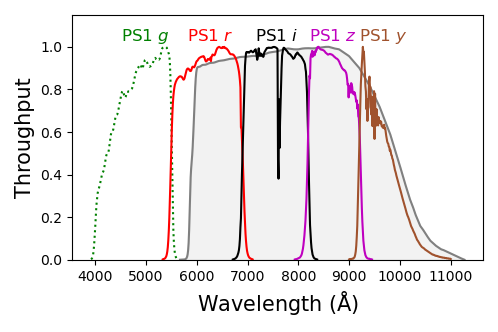

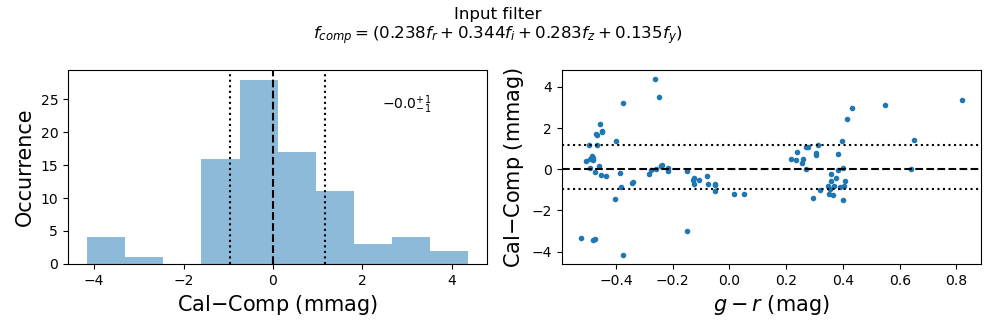

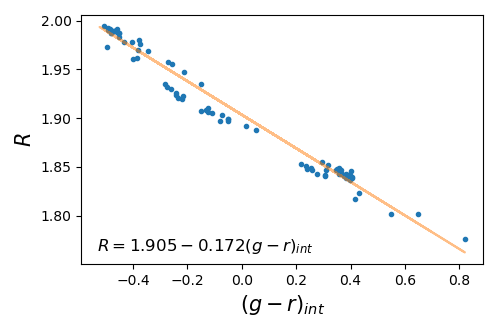

In [23]:
cal = sauron('../filters/TESS/TESS.dat',cubic_corr=False,plot=True,color_correction=False,system='ps1')

In [13]:
cal.zp

-21.793286102128995

In [12]:
cal.mags - cal.comp

array([-1.43821543e-06, -2.41130547e-06,  2.03748031e-06, -7.06129118e-07,
        2.08608402e-07, -4.90854291e-09, -5.64054053e-07,  1.50078083e-07,
        2.08883451e-06, -1.15026299e-04, -5.04812579e-06, -1.59730554e-06,
        3.00970823e-06,  8.47137205e-06,  2.65469124e-06,  2.45274110e-06,
        2.99723940e-06,  2.69438794e-06, -1.56947059e-06, -3.82146822e-06,
        3.61459362e-06, -1.24591175e-06, -1.69330785e-06, -2.63381237e-06,
       -4.69733999e-06, -4.17665877e-06,  2.59973340e-06, -4.64274891e-06,
       -4.22542599e-06, -3.86329251e-06, -2.59638112e-07,  3.91518434e-06,
        2.62592549e-06,  3.34237811e-07,  2.00120308e-06,  2.74380724e-06,
        2.20359540e-06, -2.31678504e-06, -1.44315927e-06,  2.22604945e-06,
       -2.84470932e-07,  1.89846271e-06,  2.87467343e-06, -3.11509325e-08,
        2.12556334e-06, -4.66194397e-07,  2.19133944e-06,  3.65337502e-06,
        1.86480194e-06,  1.85464497e-06, -1.38771686e-07, -3.22972902e-08,
        1.85598630e-06, -

In [10]:
cal._make_eqn()

'$f_{comp}=\\left(0.238f_r+0.344f_i+0.283f_z0.135f_y\\right)$'

In [12]:
cal.coeff

array([0.        , 0.23841424, 0.34423906, 0.28317957, 0.13528488])

In [16]:
eqn = r'$f_{comp}=\left('

var = [r'f_g',r'f_r',r'f_i',r'f_z',r'f_y']
for i in range(5):
    if cal.coeff[i] > 0.001:
        eqn += str(np.round(cal.coeff[i],3)) + var[i] 
        if (i < 4) & (cal.coeff[i+1:-1] > 0.001).any():
            print(i)
            eqn += '+'

1
2


In [15]:
eqn

'$f_{comp}=\\left(0.238f_r+0.344f_i+0.283f_z0.135f_y'

In [17]:
i =3 
(cal.coeff[i+1:-1] > 0.001).any()

False

In [18]:
cal.coeff[i+1:-1]

array([], dtype=float64)

In [8]:
for i in range(5):
    print(i)

0
1
2
3
4


Making a composite filter of input band and ps1


<IPython.core.display.Math object>

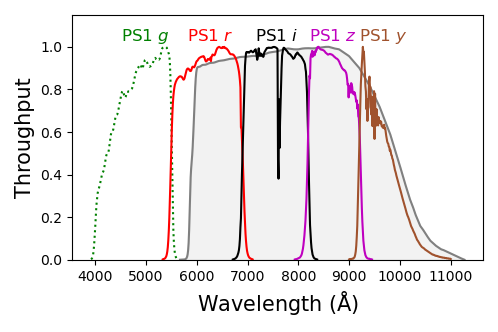

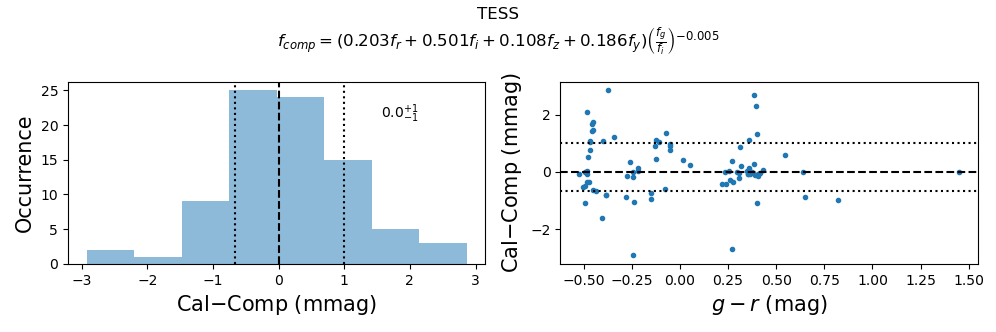

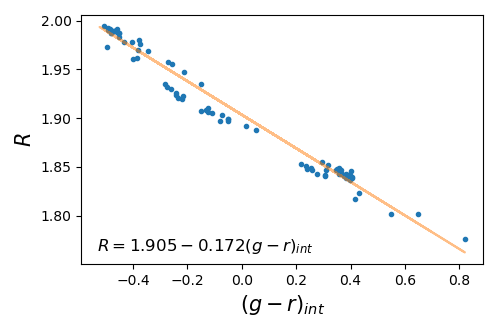

In [5]:
cal = sauron('../filters/TESS/TESS.dat',cubic_corr=False,plot=True,savename='TESS',color_correction=True)

In [6]:
cal._make_eqn()

'$f_{comp}=\\left(0.203f_r+0.501f_i+0.108f_z+0.186f_y\\right)\\left( \\frac{f_g}{f_i}\\right)^{-0.005}$'

In [9]:
from copy import deepcopy
def fit_model(coeff,bands):
   wave = deepcopy(bands[0][0])
   comp = (coeff[0]*bands[0] + coeff[1]*bands[1] + coeff[2]*bands[2] +coeff[3]*bands[3] + coeff[4]*bands[4])*(bands[0]/bands[1])**(coeff[5])
   comp[0] = wave
   return comp

def minimizer(coeff,filt):
   comp = (coeff[0]*g + coeff[1]*r + coeff[2]*i +coeff[3]*z + coeff[4]*y)*(g/i)**(coeff[5])
   res = np.sum((comp - filt)**2 )
   return res

In [10]:
def fit_model(coeff,bands):
   wave = deepcopy(bands[0][0])
   comp = (coeff[0]*bands[0] + coeff[1]*bands[1] + coeff[2]*bands[2] +coeff[3]*bands[3] + coeff[4]*bands[4])*(bands[0]/bands[1])**(coeff[5])
   comp[0] = wave
   return comp

def log_likelihood(theta, y,bands):
	model = fit_model(theta,bands)
	return -0.5 * np.sum((y[1] - model[1]) ** 2)

def log_prior(theta):
	#if theta[0] >= 0 and theta[1] >= 0 and theta[2] >= 0 and theta[3] >= 0 and theta[4] >= 0:
	return 0.0
	if (theta[:-1] >= 0).all():
		return 0.0
	return -np.inf

def log_probability(theta, y,bands):
	lp = log_prior(theta)
	if not np.isfinite(lp):
		return -np.inf
	return lp + log_likelihood(theta, y,bands)

In [11]:
bands = [g,r,i,z,y]
import emcee
c0 = np.zeros(6) + 0.5
c0[0] = 0
pos = c0 + 0.1 * np.random.randn(32, 6)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
	nwalkers, ndim, log_probability, args=(tess,bands)
	)
sampler.run_mcmc(pos, 1000, progress=True);

100%|████████████████████████████████████████| 1000/1000 [00:06<00:00, 156.99it/s]


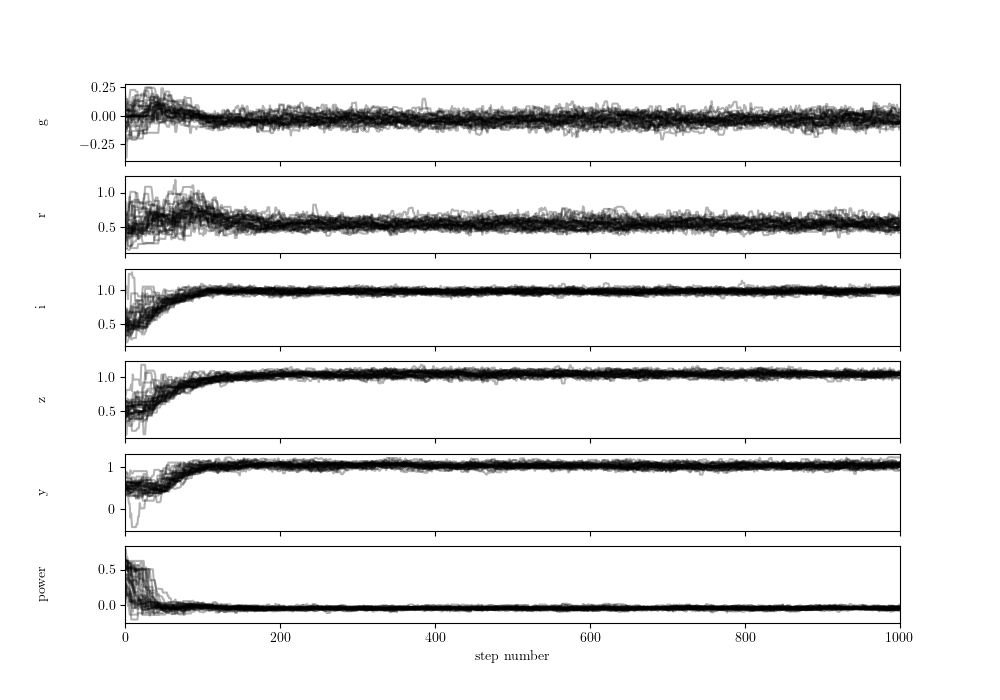

In [12]:
fig, axes = plt.subplots(6, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["g", "r", "i","z","y","power"]
for i in range(ndim):
	ax = axes[i]
	ax.plot(samples[:, :, i], "k", alpha=0.3)
	ax.set_xlim(0, len(samples))
	ax.set_ylabel(labels[i])
	ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [13]:
#tau = sampler.get_autocorr_time()
#print(tau)

In [14]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(1920, 6)


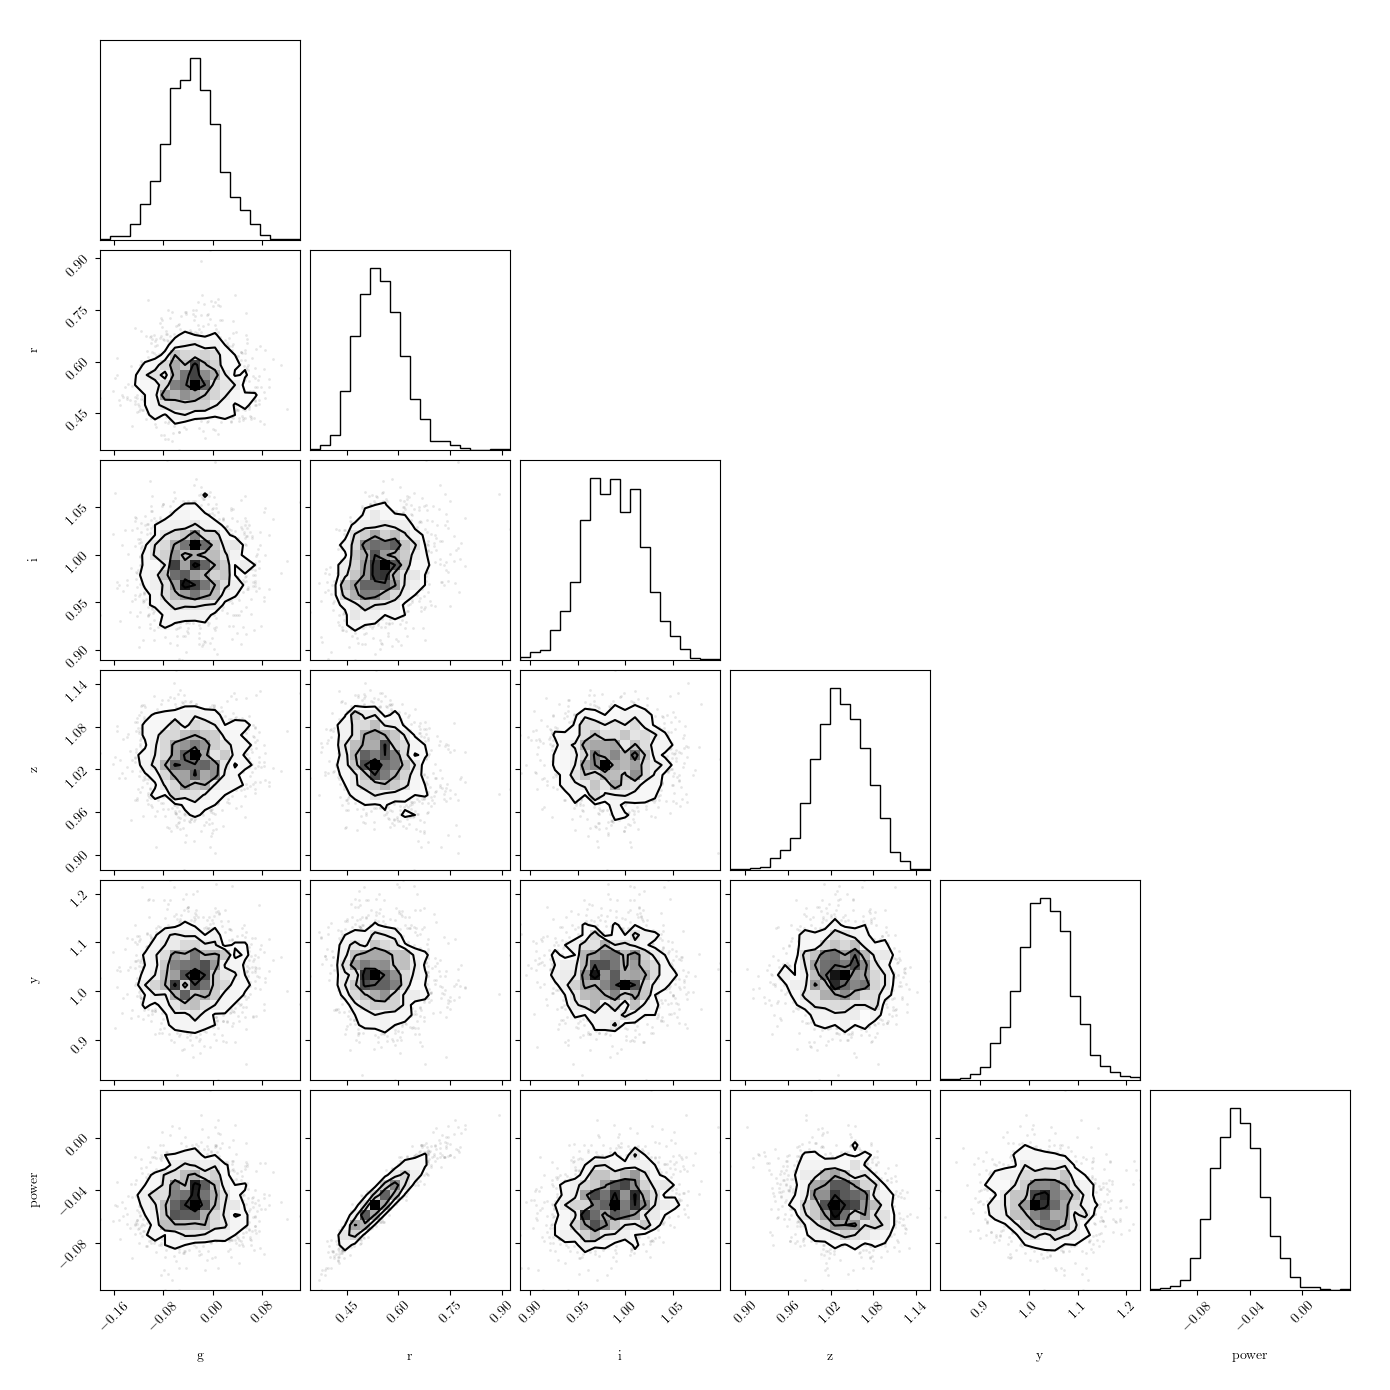

In [15]:
import corner

fig = corner.corner(
	flat_samples, labels=labels
);
plt.savefig('mcmc_fit_corner.png')

In [16]:
c = np.nanmedian(flat_samples,axis=0)
ind = c < 0.01
ind[-1] = False
c[ind] = 0
#c[0] = 0

comp = fit_model(c,bands=bands)

In [17]:
from calibrimbore.bill import *

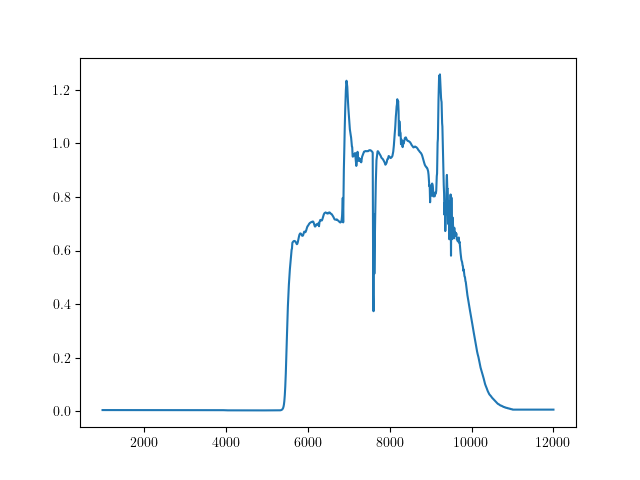

In [18]:
plt.figure()
plt.plot(comp[0],comp[1])

Making a composite filter of input band and ps1


<IPython.core.display.Math object>

RuntimeError: latex was not able to process the following string:
b'Input filter\\\\n$f_{comp}=\\\\left(0.203f_r+0.501f_i+0.108f_z+0.186f_y\\\\right)\\\\left( \\\\frac{f_g}{f_i}\\\\right)^{-0.005}$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpymbhjj52 91e8179065752dbb7abb65a94e363419.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./91e8179065752dbb7abb65a94e363419.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-02-24>
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2022/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2022/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2022/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2022/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 91e8179065752dbb7abb65a94e363419.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
l.29 {\rmfamily Input filter\n
                              $f_{comp}=\left(0.203f_r+0.501f_i+0.108f_z+0.1...
No pages of output.
Transcript written on tmpymbhjj52/91e8179065752dbb7abb65a94e363419.log.




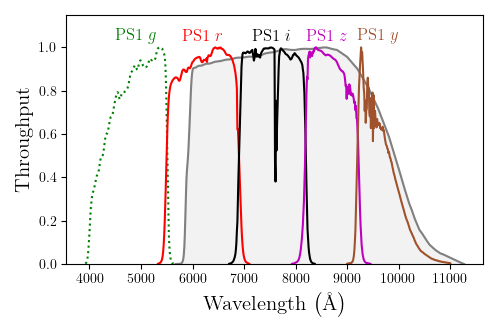

RuntimeError: latex was not able to process the following string:
b'Input filter\\\\n$f_{comp}=\\\\left(0.203f_r+0.501f_i+0.108f_z+0.186f_y\\\\right)\\\\left( \\\\frac{f_g}{f_i}\\\\right)^{-0.005}$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpwxnjzebn 91e8179065752dbb7abb65a94e363419.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./91e8179065752dbb7abb65a94e363419.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-02-24>
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2022/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2022/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2022/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2022/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 91e8179065752dbb7abb65a94e363419.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
l.29 {\rmfamily Input filter\n
                              $f_{comp}=\left(0.203f_r+0.501f_i+0.108f_z+0.1...
No pages of output.
Transcript written on tmpwxnjzebn/91e8179065752dbb7abb65a94e363419.log.




Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous view', 'arrow-left', 'back'), ('Forward', 'Forward to next view', 'arrow-right', 'forward'), ('Pan', 'Left button pans, Right button zooms\nx/y fixes axis, CTRL fixes aspect', 'arrows', 'pan'), ('Zoom', 'Zoom to rectangle\nx/y fixes axis', 'square-o', 'zoom'), ('Download', 'Download plot', 'floppy-o', 'save_figure')]))

In [140]:
cal = sauron('../filters/TESS/TESS.dat',cubic_corr=False,plot=True)

In [72]:
cal.

array([  4.0455802 ,   5.39164711,   5.94087494,  12.76500412,
        12.64183743,  11.90079036,  12.53560698,  12.23717832,
         5.21576744,  15.95376509,  12.57807944,   0.37180422,
         9.70914426,   8.93556993,   9.04095685,   9.52177969,
        10.00349067,   9.50623312,  10.01242316,  10.18503551,
        16.27165814,   4.65400925,   6.05812842,   2.33350006,
        12.459231  ,  11.77289455,   9.81082909,  12.42292294,
        13.98025861,  13.65174879,  12.59176343,   8.42498989,
         9.49599012,   7.59086124,   7.1711269 ,   8.12567793,
         8.96335549,   8.71248934,   6.15832025,   8.41781729,
         6.70025196,   6.26658806,   8.51799334,   7.00747424,
         8.66404985,   9.65438983,   7.79970856,   8.69700806,
         6.49341442,   7.4537939 ,   7.68679556,   8.50557039,
         7.5760166 ,   9.69428567,   7.56884152,  17.21310444,
        15.2987053 ,  15.32018303,  14.35569793,  13.54929932,
        12.33210134,  12.29788968,  12.29688931,  14.94

In [61]:
import pysynphot as S

def model_mag(band,specs,zp=25):
    mags = []
    for file in files:
        spec = at.Table.read(file, format='ascii')
        spec = S.ArraySpectrum(spec['wave'], spec['flux'], fluxunits='flam',keepneg=True)
        mags += [synmag(spec,band,zp)]
    mags = np.array(mags)
    return mags

In [88]:
files = files = glob('/Users/rri38/Documents/work/code/calibrimbore/calibrimbore/data/ckmodel/' + '*.dat')
files = np.array(files)
# make sure the mags are in the same order
files.sort()

gb = S.ArrayBandpass(g[0], g[1], waveunits='Angstrom')
gzp = get_pb_zpt(gb)
rb = S.ArrayBandpass(r[0], r[1], waveunits='Angstrom')
rzp = get_pb_zpt(rb)
gmag = model_mag(gb,files,gzp)
rmag = model_mag(rb,files,rzp)
ind = ((gmag - rmag) > -1) & ((gmag - rmag) < 0.8)

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [81]:
ind

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [20]:
tb = S.ArrayBandpass(tess[0], tess[1], waveunits='Angstrom')
tzp = get_pb_zpt(tb)
gb = S.ArrayBandpass(g[0], g[1], waveunits='Angstrom')
gzp = get_pb_zpt(gb)
rb = S.ArrayBandpass(r[0], r[1], waveunits='Angstrom')
rzp = get_pb_zpt(rb)
ib = S.ArrayBandpass(i[0], i[1], waveunits='Angstrom')
izp = get_pb_zpt(ib)
zb = S.ArrayBandpass(z[0], z[1], waveunits='Angstrom')
zzp = get_pb_zpt(zb)
yb = S.ArrayBandpass(y[0], y[1], waveunits='Angstrom')
yzp = get_pb_zpt(yb)

ctb = S.ArrayBandpass(comp[0], comp[1], waveunits='Angstrom')
ctzp =get_pb_zpt(ctb)

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [66]:
tmag = model_mag(tb,files,tzp)
gmag = model_mag(gb,files,gzp)
rmag = model_mag(rb,files,rzp)
imag = model_mag(ib,files,izp)
zmag = model_mag(zb,files,zzp)
ymag = model_mag(yb,files,yzp)

ctmag = model_mag(ctb,files,ctzp)

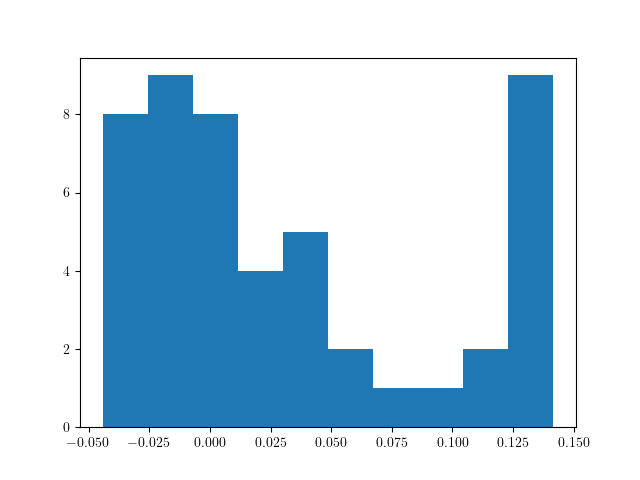

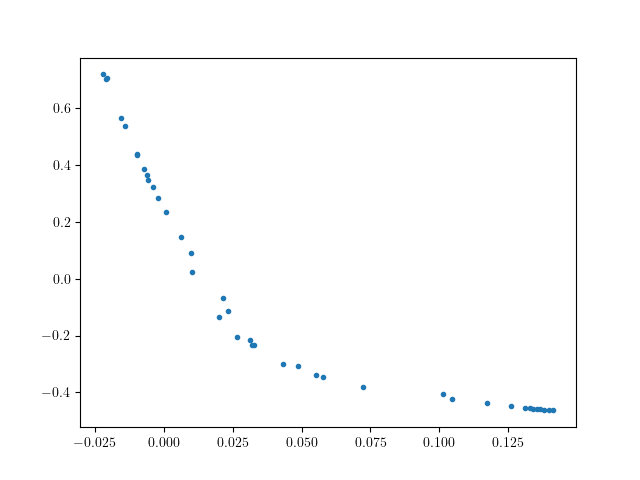

In [67]:
diff = tmag - ctmag
plt.figure()
plt.hist(diff);
plt.figure()
plt.plot(diff[ind],(gmag-rmag)[ind],'.')

## Bayes fit the mag diff 

In [131]:
def fit_model(coeff,bands):
    wave = deepcopy(bands[0][0])
    #comp = (coeff[0]*bands[0] + coeff[1]*bands[1] + coeff[2]*bands[2] +coeff[3]*bands[3] + coeff[4]*bands[4])*(bands[0]/bands[1])**(coeff[5])
    comp = (coeff[0]*0 + coeff[1]*bands[1] + coeff[2]*bands[2] +coeff[3]*bands[3] + coeff[4]*bands[4])#+(bands[0]/bands[1])**(coeff[5])
    comp[0] = wave
    return comp

def log_likelihood(theta, tmag,bands,files):
    try:
        ind = theta < 0.01
        ind[-1] = False
        theta[ind] = 0
        model = fit_model(theta,bands)
        ctb = S.ArrayBandpass(model[0], model[1], waveunits='Angstrom')
        ctzp = get_pb_zpt(ctb)
        ctmag = model_mag(ctb,files,ctzp)
        #print(ctmag)
        ret = -0.5 * np.sum((tmag[1] - ctmag[1]) ** 2)
        #print(ret)
        return ret
    except:
        return -1e3

def log_prior(theta):
    #if theta[0] >= 0 and theta[1] >= 0 and theta[2] >= 0 and theta[3] >= 0 and theta[4] >= 0:
    return 0.0
    if (theta[:-1] >= 0).all():
        return 0.0
    return -np.inf

def log_probability(theta, tmag,bands,files):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, tmag,bands,files)

In [132]:
from scipy.optimize import minimize

In [133]:
nll = lambda *args: -log_likelihood(*args)
initial =  np.zeros(6) + 0.5
initial[0] = 0
initial[-1] = 0
soln = minimize(nll, initial, args=(tmag[ind], bands,files[ind]))

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

In [134]:
soln.x

array([0.        , 0.22301414, 0.5514057 , 0.62745831, 0.58899469,
       0.        ])

In [135]:
comp2 = fit_model(soln.x,bands=bands)

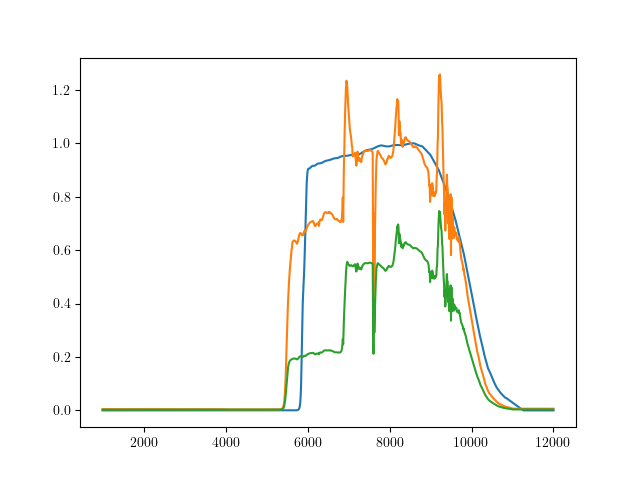

In [136]:
plt.figure()
plt.plot(tess[0],tess[1])
plt.plot(comp[0],comp[1])
plt.plot(comp2[0],comp2[1])

In [137]:
ctb2 = S.ArrayBandpass(comp2[0], comp2[1], waveunits='Angstrom')
ctzp2 =get_pb_zpt(ctb2)
ctmag2 = model_mag(ctb2,files,ctzp2)

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [138]:
soln.x

array([0.        , 0.22301414, 0.5514057 , 0.62745831, 0.58899469,
       0.        ])

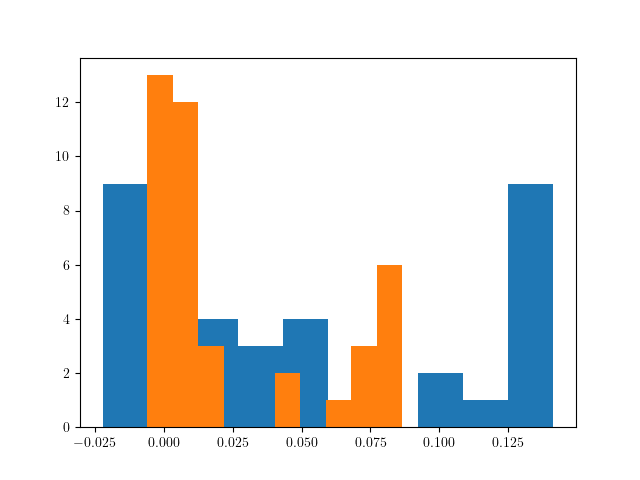

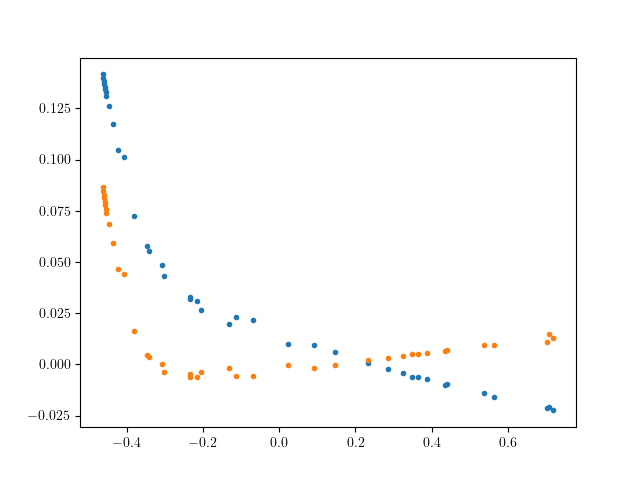

In [139]:
diff = tmag - ctmag
diff2 = tmag - ctmag2
plt.figure()
plt.hist(diff[ind]);
plt.hist(diff2[ind]);
plt.figure()
plt.plot((gmag-rmag)[ind],diff[ind],'.')
plt.plot((gmag-rmag)[ind],diff2[ind],'.')

In [114]:
from multiprocessing import Pool
import time 
c0 = soln.x
#c0[0] = 0
#c0[-1] = 0
initial = c0 + 1e-4 * np.random.randn(32, 6)
nwalkers, ndim = pos.shape

nsteps = 5000
with Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, pool=pool)
    start = time.time()
    sampler.run_mcmc(initial, nsteps, progress=True)
    end = time.time()
    multi_time = end - start
    print("Multiprocessing took {0:.1f} seconds".format(multi_time))
    print("{0:.1f} times faster than serial".format(serial_time / multi_time))

Process SpawnPoolWorker-64:
Process SpawnPoolWorker-61:
Process SpawnPoolWorker-63:
Process SpawnPoolWorker-66:
Process SpawnPoolWorker-70:
Process SpawnPoolWorker-65:
Process SpawnPoolWorker-62:
Process SpawnPoolWorker-67:
Process SpawnPoolWorker-69:
Process SpawnPoolWorker-68:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/rri38/miniconda3/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/rri38/miniconda3/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/rri38/miniconda3/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/rri38/miniconda3/lib/

Process SpawnPoolWorker-86:
Process SpawnPoolWorker-89:
Process SpawnPoolWorker-90:
Process SpawnPoolWorker-81:
Process SpawnPoolWorker-84:
Process SpawnPoolWorker-87:
Process SpawnPoolWorker-88:
Process SpawnPoolWorker-85:
Process SpawnPoolWorker-82:
Process SpawnPoolWorker-83:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/rri38/miniconda3/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/rri38/miniconda3/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/rri38/miniconda3/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/rri38/miniconda3/lib/python3.12/multiprocessing/process.py", line 314, in _boots

Process SpawnPoolWorker-97:
Process SpawnPoolWorker-94:
Process SpawnPoolWorker-95:
Process SpawnPoolWorker-102:
Process SpawnPoolWorker-100:
Process SpawnPoolWorker-101:
Process SpawnPoolWorker-98:
Process SpawnPoolWorker-99:
Process SpawnPoolWorker-96:
Process SpawnPoolWorker-93:


KeyboardInterrupt: 

In [52]:
bands = [g,r,i,z,y]
import emcee
c0 = soln.x
c0[0] = 0
c0[-1] = 0
pos = c0 + 1e-4 * np.random.randn(32, 6)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(tmag,bands))
sampler.run_mcmc(pos, 5000, progress=True);

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|                                                    | 0/5000 [00:00<?, ?it/s]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|                                          | 1/5000 [00:04<6:19:05,  4.55s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|                                          | 2/5000 [00:09<6:26:16,  4.64s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|                                          | 3/5000 [00:14<6:41:24,  4.82s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|                                          | 4/5000 [00:18<6:36:31,  4.76s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|                                          | 5/5000 [00:23<6:39:12,  4.80s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|                                          | 6/5000 [00:28<6:47:18,  4.89s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|                                          | 7/5000 [00:33<6:46:10,  4.88s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|                                          | 8/5000 [00:38<6:36:53,  4.77s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|                                          | 9/5000 [00:42<6:33:16,  4.73s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|                                         | 10/5000 [00:47<6:39:38,  4.81s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|                                         | 11/5000 [00:52<6:33:25,  4.73s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|                                         | 12/5000 [00:57<6:31:02,  4.70s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|                                         | 13/5000 [01:01<6:27:18,  4.66s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|                                         | 14/5000 [01:06<6:26:22,  4.65s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|                                         | 15/5000 [01:10<6:23:55,  4.62s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|▏                                        | 16/5000 [01:15<6:21:50,  4.60s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|▏                                        | 17/5000 [01:19<6:21:12,  4.59s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|▏                                        | 18/5000 [01:24<6:21:01,  4.59s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|▏                                        | 19/5000 [01:29<6:22:46,  4.61s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|▏                                        | 20/5000 [01:33<6:22:38,  4.61s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|▏                                        | 21/5000 [01:38<6:23:42,  4.62s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|▏                                        | 22/5000 [01:43<6:24:30,  4.63s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|▏                                        | 23/5000 [01:47<6:24:07,  4.63s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|▏                                        | 24/5000 [01:52<6:24:18,  4.63s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  0%|▏                                        | 25/5000 [01:56<6:21:16,  4.60s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▏                                        | 26/5000 [02:01<6:18:42,  4.57s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▏                                        | 27/5000 [02:05<6:16:48,  4.55s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▏                                        | 28/5000 [02:10<6:16:38,  4.55s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▏                                        | 29/5000 [02:15<6:20:02,  4.59s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▏                                        | 30/5000 [02:20<6:28:12,  4.69s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▎                                        | 31/5000 [02:24<6:31:06,  4.72s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▎                                        | 32/5000 [02:29<6:35:20,  4.77s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▎                                        | 33/5000 [02:34<6:37:30,  4.80s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▎                                        | 34/5000 [02:39<6:33:25,  4.75s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▎                                        | 35/5000 [02:43<6:30:23,  4.72s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▎                                        | 36/5000 [02:48<6:27:12,  4.68s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▎                                        | 37/5000 [02:53<6:25:31,  4.66s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▎                                        | 38/5000 [02:57<6:27:34,  4.69s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▎                                        | 39/5000 [03:02<6:28:17,  4.70s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▎                                        | 40/5000 [03:06<6:20:25,  4.60s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▎                                        | 41/5000 [03:11<6:17:28,  4.57s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▎                                        | 42/5000 [03:15<6:02:05,  4.38s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▎                                        | 43/5000 [03:19<5:54:03,  4.29s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▎                                        | 44/5000 [03:23<6:00:19,  4.36s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▎                                        | 45/5000 [03:27<5:49:11,  4.23s/it]

(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(UnnamedArrayBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used i

  1%|▎                                        | 45/5000 [03:30<6:25:32,  4.67s/it]


ValueError: Probability function returned NaN

In [ ]:
tzp = get_pb_zpt(tb)

In [82]:
comp =[0.00480191,0.50426854,0.48709393,0.50491031,0.51531641,0.50466015]
a = fit_model(comp,bands)

In [83]:
a

array([[1.00000000e+03, 1.00100000e+03, 1.00200000e+03, ...,
        1.19970000e+04, 1.19980000e+04, 1.19990000e+04],
       [3.18167422e-03, 3.18167422e-03, 3.18167422e-03, ...,
        4.16333248e-03, 4.16333248e-03, 4.16333248e-03]])

In [33]:
from calibrimbore import *
cal = sauron(band='../filters/TESS/TESS.dat',plot=False,system='ps1',gr_lims=[-1,.8],cubic_corr=False)

Making a composite filter of input band and ps1


<IPython.core.display.Math object>

In [38]:
gf = mag2flux(cal.sys_mags['g'])
rf = mag2flux(cal.sys_mags['r'])
iflux = mag2flux(cal.sys_mags['i'])
zf = mag2flux(cal.sys_mags['z'])
yf = mag2flux(cal.sys_mags['y'])
fluxes = [gf,rf,iflux,zf,yf]
target_flux = 

gr = cal.sys_mags['g'] - cal.sys_mags['r']
ind = ((gr > cal.gr_lims[0]) & 
		(gr < cal.gr_lims[1])) 
ind2 = (gr < 0.26855) | (gr > 0.2688)	
ind = ind & ind2

In [44]:
def make_model(coeff,bands):
   wave = deepcopy(bands[0][0])
   comp = (coeff[0]*bands[0] + coeff[1]*bands[1] + coeff[2]*bands[2] +coeff[3]*bands[3] + coeff[4]*bands[4])*(bands[0]/bands[1])**(coeff[5])
   comp[0] = wave
   return comp

def combine_fluxes(coeff,flux):
	comp = (coeff[0]*flux[0] + coeff[1]*flux[1] + coeff[2]*flux[2] +coeff[3]*flux[3] + coeff[4]*flux[4])*(flux[0]/flux[1])**(coeff[5])
	return comp
   

def log_likelihood(model, y):
	model = make_model(theta,bands)
	return -0.5 * np.sum((y[1] - model[1]) ** 2)

def log_likelihood_flux(theta,flux,target_fluxes):
	model = combine_fluxes(theta,flux)
	return -0.5 * np.sum((target_fluxes - model) ** 2)

def log_prior(theta):
	#if theta[0] >= 0 and theta[1] >= 0 and theta[2] >= 0 and theta[3] >= 0 and theta[4] >= 0:
	return 0.0
	if (theta[:-1] >= 0).all():
		return 0.0
	return -np.inf

def log_probability(theta, target_filter,bands,flux,target_flux):
	model = make_model(theta,bands)
	lp = log_prior(theta)
	if not np.isfinite(lp):
		return -np.inf
	return lp + log_likelihood(model, target_filter) + log_likelihood_mags(theta,flux,target_flux)

array([3.64315152e+08, 1.36070926e+08, 2.66480711e+07, 1.02591121e+05,
       1.02965025e+05, 1.86355367e+05, 1.26754981e+05, 1.48316604e+05,
       5.32269356e+07, 9.00792197e+01, 2.17621391e+05, 1.09171925e+10,
       9.25955847e+05, 1.68626412e+05, 1.82833502e+06, 1.16206236e+06,
       6.81892035e+05, 1.16289049e+06, 1.47152830e+06, 1.94324486e+06,
       2.15609142e+03, 2.03111758e+08, 5.97199356e+07, 2.24415054e+09,
       2.33194829e+05, 4.34591701e+05, 7.40325100e+05, 2.46569580e+05,
       5.68790902e+04, 7.53507348e+04, 1.28715545e+05, 2.02978669e+06,
       1.23274142e+06, 9.41568182e+06, 9.07841444e+06, 3.85678207e+06,
       1.66414500e+06, 5.37278645e+06, 5.27046373e+07, 2.65427112e+06,
       2.65499054e+07, 2.05116582e+07, 2.85311904e+06, 1.84805638e+07,
       2.24756168e+06, 1.78146135e+06, 4.69629608e+06, 1.88772684e+06,
       1.69252910e+07, 7.53967250e+06, 1.01512063e+07, 4.81914786e+06,
       6.52981301e+06, 1.77270781e+06, 1.91167297e+07, 2.63309537e+03,
      

In [37]:
from scipy.optimize import minimize

In [40]:
def log_likelihood(theta, x, y, yerr):
	m, b, log_f = theta
	model = m * x + b
	sigma2 = yerr**2 + model**2 * np.exp(2 * log_f)
	return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

In [62]:
c0 = np.zeros(6) + 0.5
res = minimize(minimizer,c0,args=pstess,method='Nelder-Mead')
c0 = res.x

In [17]:
comp = (c[0]*g + c[1]*r + c[2]*i +c[3]*z + c[4]*y)*(g/i)**(c[5])

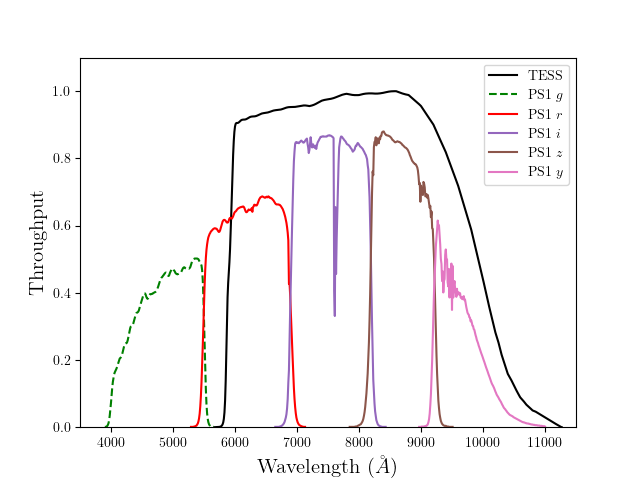

In [25]:
# compare throughputs
plt.figure()
plt.plot(TESS[:,0],TESS[:,1],'k',label = 'TESS', rasterized=True)
#plt.plot(Kepler[:,0],Kepler[:,1],label = 'Kepler', rasterized=True)
plt.plot(PSg[:,0],PSg[:,1],'g--',label = r'PS1 $g$', rasterized=True)
plt.plot(PSr[:,0],PSr[:,1],'r',label = r'PS1 $r$', rasterized=True)
plt.plot(PSi[:,0],PSi[:,1],'C4',label = r'PS1 $i$', rasterized=True)
plt.plot(PSz[:,0],PSz[:,1],'C5',label = r'PS1 $z$', rasterized=True)
plt.plot(PSy[:,0],PSy[:,1],'C6',label = r'PS1 $y$', rasterized=True)
#plt.plot(PStess[:,0],PStess[:,1],label = r'PS $TESS$', rasterized=True)
#plt.plot(comp_filt[0],comp_filt[1]/np.nanmax(comp_filt[1]),label = r'PS1 $TESS$', rasterized=True)
plt.ylim(0,1.1)
plt.xlim(3500,11500)
plt.xlabel(r'Wavelength $(\AA)$',fontsize=15)
plt.ylabel('Throughput',fontsize=15)
plt.legend()
#plt.title('Comparison of TESS and PS1 filter throughputs')
plt.savefig('TESS_PS1_filters.pdf', dpi=400)

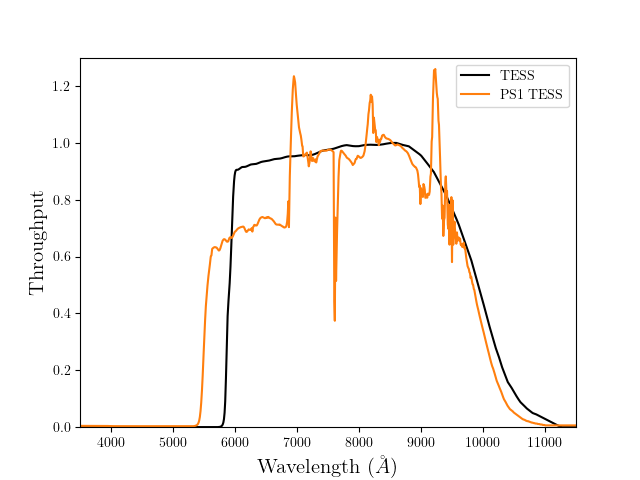

In [59]:
# compare throughputs
plt.figure()
plt.plot(tess[0],tess[1],'k',label = 'TESS', rasterized=True)
plt.plot(comp[0],comp[1],'C1',label = r'PS1 TESS', rasterized=True)
plt.ylim(0,1.3)
plt.xlim(3500,11500)
plt.xlabel(r'Wavelength $(\AA)$',fontsize=15)
plt.ylabel('Throughput',fontsize=15)
plt.legend()
#plt.title('Comparison of TESS and PS1 filter throughputs')
plt.savefig('PS1TESS_filter.pdf', dpi=400)

In [5]:
def Norm(filt):
    f = filt.copy()
    f[:,1] = f[:,1] / np.nanmax(f[:,1])#
    #f[:,1] = f[:,1] / np.trapz(f[:,1],x=f[:,0])
    return f

<IPython.core.display.Javascript object>


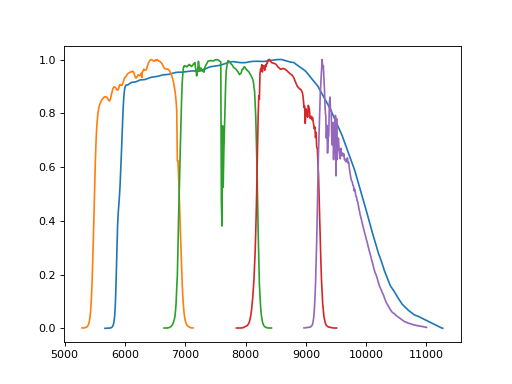

In [6]:
plt.figure()
plt.plot(Norm(TESS)[:,0],Norm(TESS)[:,1])
plt.plot(Norm(PSr)[:,0],Norm(PSr)[:,1])
plt.plot(Norm(PSi)[:,0],Norm(PSi)[:,1])
plt.plot(Norm(PSz)[:,0],Norm(PSz)[:,1])
plt.plot(Norm(PSy)[:,0],Norm(PSy)[:,1])

In [132]:
x = np.arange(np.nanmin(PSr[:,0]),np.max(TESS[:,0]))
psr = interpolate.interp1d(Norm(PSr)[:,0],Norm(PSr)[:,1],bounds_error=False,fill_value=0)
psi = interpolate.interp1d(Norm(PSi)[:,0],Norm(PSi)[:,1],bounds_error=False,fill_value=0)
psz = interpolate.interp1d(Norm(PSz)[:,0],Norm(PSz)[:,1],bounds_error=False,fill_value=0)
psy = interpolate.interp1d(Norm(PSy)[:,0],Norm(PSy)[:,1],bounds_error=False,fill_value=0)
tess = interpolate.interp1d(Norm(TESS)[:,0],Norm(TESS)[:,1],bounds_error=False,fill_value=0)

<IPython.core.display.Javascript object>


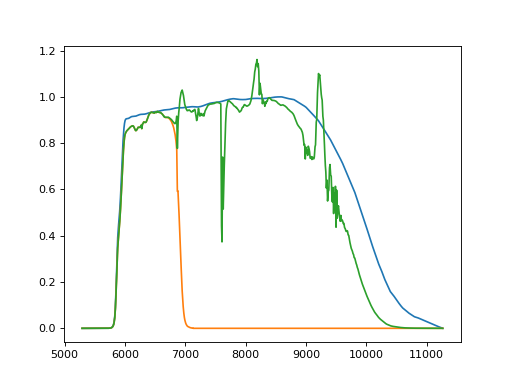

In [110]:
plt.figure()
plt.plot(x,tess(x))
plt.plot(x,psr(x) * tess(x))
#plt.plot(x,psi(x) * tess(x))
#plt.plot(x,psz(x) * tess(x))
#plt.plot(x,psy(x) * tess(x))
plt.plot(x,(psy(x) * tess(x)) + (psz(x) * tess(x)) + (psi(x) * tess(x)) + (psr(x) * tess(x)))

In [111]:
r = np.nansum( psr(x) * tess(x)) / np.nansum(psr(x))
i = np.nansum( psi(x) * tess(x)) / np.nansum(psi(x))
z = np.nansum( psz(x) * tess(x)) / np.nansum(psz(x))
y = np.nansum( psy(x) * tess(x)) / np.nansum(psy(x))

In [112]:
print('r',r)
print('i',i)
print('z',z)
print('y',y)

r 0.6766804426427891
i 0.97513971688656
z 0.9772746798905938
y 0.6725395346093791


# Try fitting

In [135]:
def Filt_fit(coeff, ps1,tess):
    fake = np.nansum(coeff[:,np.newaxis]*ps1,axis=0)
    if (coeff < 0).any():
        residual = np.inf
    else:
        residual = np.nansum(abs(fake - tess))/np.nansum(tess)
        residual = abs(np.trapz(fake) - np.trapz(tess))
    print(residual)
    return residual

In [136]:
ps1 = np.array([psr(x),psi(x),psz(x),psy(x)])
t = tess(x)
coeff = np.array([r,i,z,y])

In [137]:
test = ps1 * coeff[:,np.newaxis]

In [138]:
from scipy.optimize import minimize

In [139]:
res = minimize(Filt_fit,coeff,args=(ps1,t))

437.62047618140014
437.62045654048825
437.62045766484744
437.62046179058734
437.62046701811914
437.62047618140014
1726.7680289943241
1726.7680289943241
1726.768048635237
1726.7680475108778
1726.768043385137
1726.7680381576051
10.076416908259944
10.076416908259944
10.07643654917274
10.076435424813553
10.076431299073647
10.076426071541846
213.77203579716797
213.77203579716797
213.7720161562561
213.77201728061527
213.77202140635472
213.77202663388698
23.649825324986068
23.649825324986068
23.64980568407418
23.649806808433368
23.64981093417282
23.649816161705076
1.1425446673488295
1.1425446673488295
1.1425643082616261
1.1425631839019843
1.1425590581620781
1.1425538306298222
15.22041952759264
15.22041952759264
15.220399886679843
15.220401011039485
15.22040513677939
15.220410364311192
1.4346862143097496
1.4346862143097496
1.434666573396953
1.4346676977561401
1.4346718234960463
1.4346770510283022
0.06704258663603468
0.06704258663603468
0.0670622275479218
0.0670611031887347
0.0670569774492833
0

6.027676136000082e-09
6.027676136000082e-09
1.9634884210972814e-05
1.851052547863219e-05
1.4384785117727006e-05
9.15725331651629e-06
6.027676136000082e-09
6.027676136000082e-09
1.9634884210972814e-05
1.851052547863219e-05
1.4384785117727006e-05
9.15725331651629e-06
6.027676136000082e-09
6.027676136000082e-09
1.9634884210972814e-05
1.851052547863219e-05
1.4384785117727006e-05
9.15725331651629e-06
6.027676136000082e-09
6.027676136000082e-09
1.9634884210972814e-05
1.851052547863219e-05
1.4384785117727006e-05
9.15725331651629e-06
6.027676136000082e-09
6.027676136000082e-09
1.9634884210972814e-05
1.851052547863219e-05
1.4384785117727006e-05
9.15725331651629e-06
6.027676136000082e-09
6.027676136000082e-09
1.9634884210972814e-05
1.851052547863219e-05
1.4384785117727006e-05
9.15725331651629e-06
6.027676136000082e-09
6.027676136000082e-09
1.9634884210972814e-05
1.851052547863219e-05
1.4384785117727006e-05
9.15725331651629e-06
6.027676136000082e-09
6.027676136000082e-09
1.9634884210972814e-05
1.

In [143]:
res.x

array([0.80228678, 1.0935556 , 1.06930582, 0.73114007])

In [141]:
fake = np.nansum(coeff[:,np.newaxis]*ps1,axis=0)
fit = np.nansum(res.x[:,np.newaxis]*ps1,axis=0)

<IPython.core.display.Javascript object>


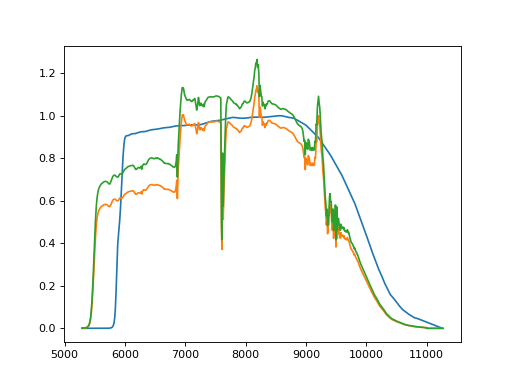

In [142]:
plt.figure()
plt.plot(x,tess(x))
plt.plot(x,fake)
plt.plot(x,fit)

In [114]:
np.nansum(abs(fake - tess(x)))/np.nansum(tess(x))

0.6892822461471647

In [81]:
np.sum(fit)/np.sum(t)

1.0662240201890072

In [130]:
filt.shape

(5980, 2)

In [134]:
filt = np.array([x,fake]).T
np.savetxt('../../source_synphot/source_synphot/passbands/TESS/ps1_tess.dat',filt)